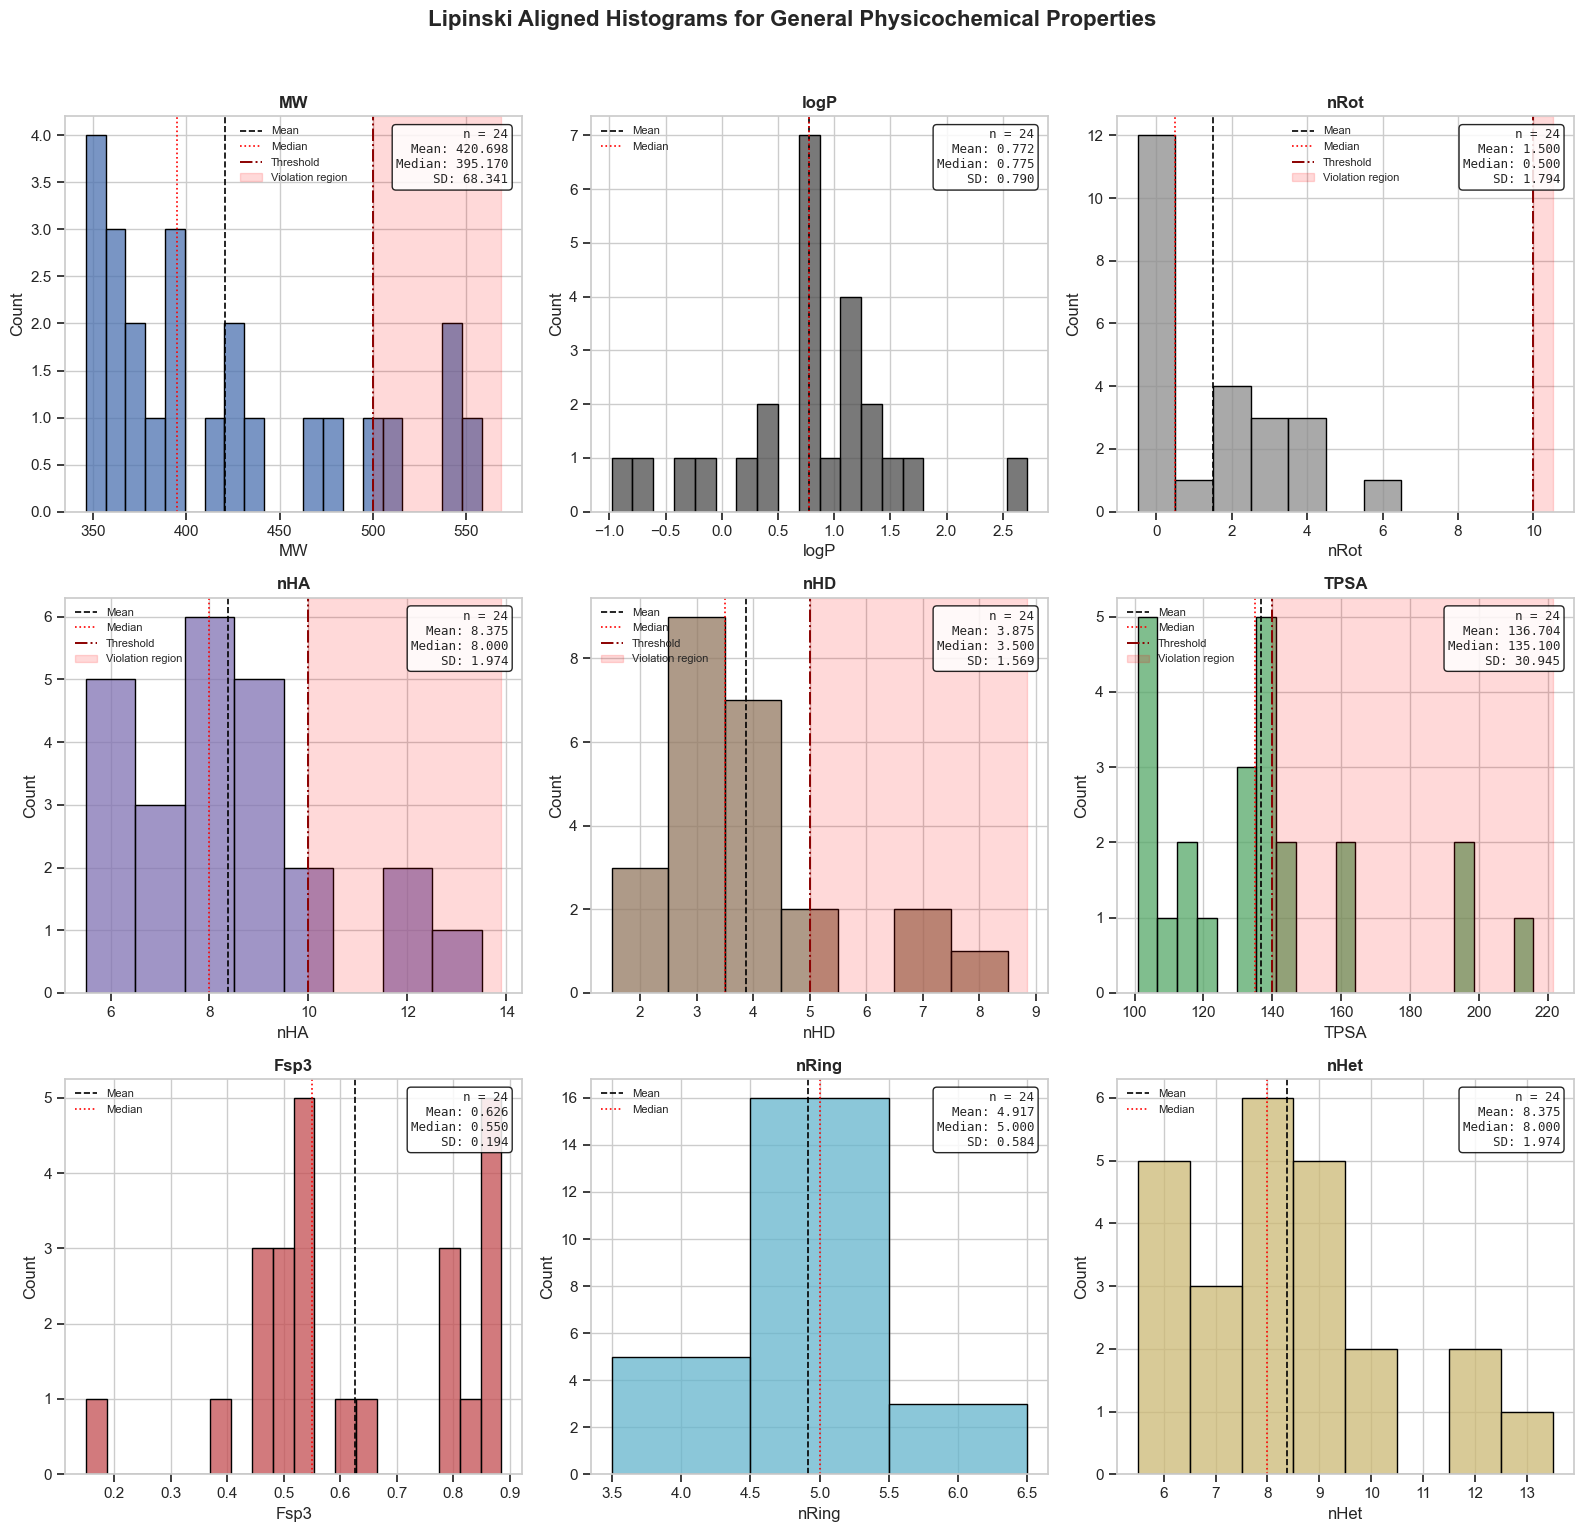

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# =========================================================
# Configuration
# =========================================================
INPUT_FILE = "cuasinoides.xlsx"
SHEET_NAME = "ADMET"
OUTPUT_DIR = "0.FQ"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# =========================================================
# Read data
# =========================================================
df = pd.read_excel(INPUT_FILE, sheet_name=SHEET_NAME)

cols_requested = [
    "MW",
    "logP",
    "nRot",
    "nHA",
    "nHD",
    "TPSA",
    "Fsp3",
    "nRing",
    "nHet" 
]

df = df.reindex(columns=cols_requested)

# =========================================================
# Clean column names
# =========================================================
def clean_name(col):
    col = col.replace("[General Properties/", "")
    col = col.replace("] Predictions", "")
    return col.strip()

df = df.rename(columns={c: clean_name(c) for c in df.columns})

# Convert to numeric
df = df.apply(pd.to_numeric, errors="coerce")
df = df.dropna(axis=1, how="all")

# =========================================================
# Variable classification
# =========================================================
def classify_var(col):
    col = col.lower()
    if any(k in col for k in ["nha", "nhd", "nring", "nhet", "nrot"]):
        return "count"
    return "continuous"

var_types = {c: classify_var(c) for c in df.columns}

# =========================================================
# Descriptor colors + Lipinski / Veber rules
# =========================================================
DESCRIPTOR_RULES = {
    "MW": {
        "color": "#4C72B0",
        "threshold": 500,
        "direction": "greater"
    },
    "Log(P)": {
        "color": "#DD8452",
        "threshold": 5,
        "direction": "greater"
    },
    "TPSA": {
        "color": "#55A868",
        "threshold": 140,
        "direction": "greater"
    },
    "nHD": {
        "color": "#937860",
        "threshold": 5,
        "direction": "greater"
    },
    "nHA": {
        "color": "#8172B3",
        "threshold": 10,
        "direction": "greater"
    },
    "nRot": {
        "color": "#8C8C8C",
        "threshold": 10,
        "direction": "greater"
    },
    "Fsp3": {
        "color": "#C44E52",
        "threshold": None
    },
    "nRing": {
        "color": "#64B5CD",
        "threshold": None
    },
    "nHet": {
        "color": "#CCB974",
        "threshold": None
    }
}

# =========================================================
# Plot style
# =========================================================
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("notebook")

# =========================================================
# Histogram function (COUNT + shaded forbidden region)
# =========================================================
def create_histogram(ax, series, title, var_type):
    data = series.dropna()
    if data.empty:
        ax.set_title(title)
        ax.text(0.5, 0.5, "No data", ha="center", va="center")
        return

    rule = DESCRIPTOR_RULES.get(title, {})
    color = rule.get("color", "#4C4C4C")
    threshold = rule.get("threshold", None)
    direction = rule.get("direction", None)

    if var_type == "count":
        bins = np.arange(data.min() - 0.5, data.max() + 1.5, 1)
    else:
        bins = 20

    sns.histplot(
        data,
        bins=bins,
        stat="count",
        color=color,
        edgecolor="black",
        alpha=0.75,
        ax=ax
    )

    # Statistics
    mean = data.mean()
    median = data.median()
    std = data.std()

    ax.axvline(mean, color="black", linestyle="--", linewidth=1.2, label="Mean")
    ax.axvline(median, color="red", linestyle=":", linewidth=1.2, label="Median")

    # Lipinski / Veber forbidden region
    if threshold is not None and direction == "greater":
        ax.axvline(
            threshold,
            color="darkred",
            linestyle="-.",
            linewidth=1.4,
            label="Threshold"
        )
        ax.axvspan(
            threshold,
            ax.get_xlim()[1],
            color="red",
            alpha=0.15,
            label="Violation region"
        )

    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.set_xlabel(title)
    ax.set_ylabel("Count")
    ax.legend(fontsize=8)

    text = (
        f"n = {len(data)}\n"
        f"Mean: {mean:.3f}\n"
        f"Median: {median:.3f}\n"
        f"SD: {std:.3f}"
    )

    ax.text(
        0.97, 0.97,
        text,
        transform=ax.transAxes,
        ha="right",
        va="top",
        fontsize=9,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.85),
        fontfamily="monospace"
    )

# =========================================================
# Create figure
# =========================================================
cols = list(df.columns)
ncols = 3
nrows = int(np.ceil(len(cols) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    create_histogram(
        axes[i],
        df[col],
        col,
        var_types[col]
    )

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(
    "Lipinski Aligned Histograms for General Physicochemical Properties",
    fontsize=16,
    fontweight="bold",
    y=1.02
)

plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "general_properties_lipinski_histograms2.png"),
    dpi=350,
    bbox_inches="tight"
)
plt.show()


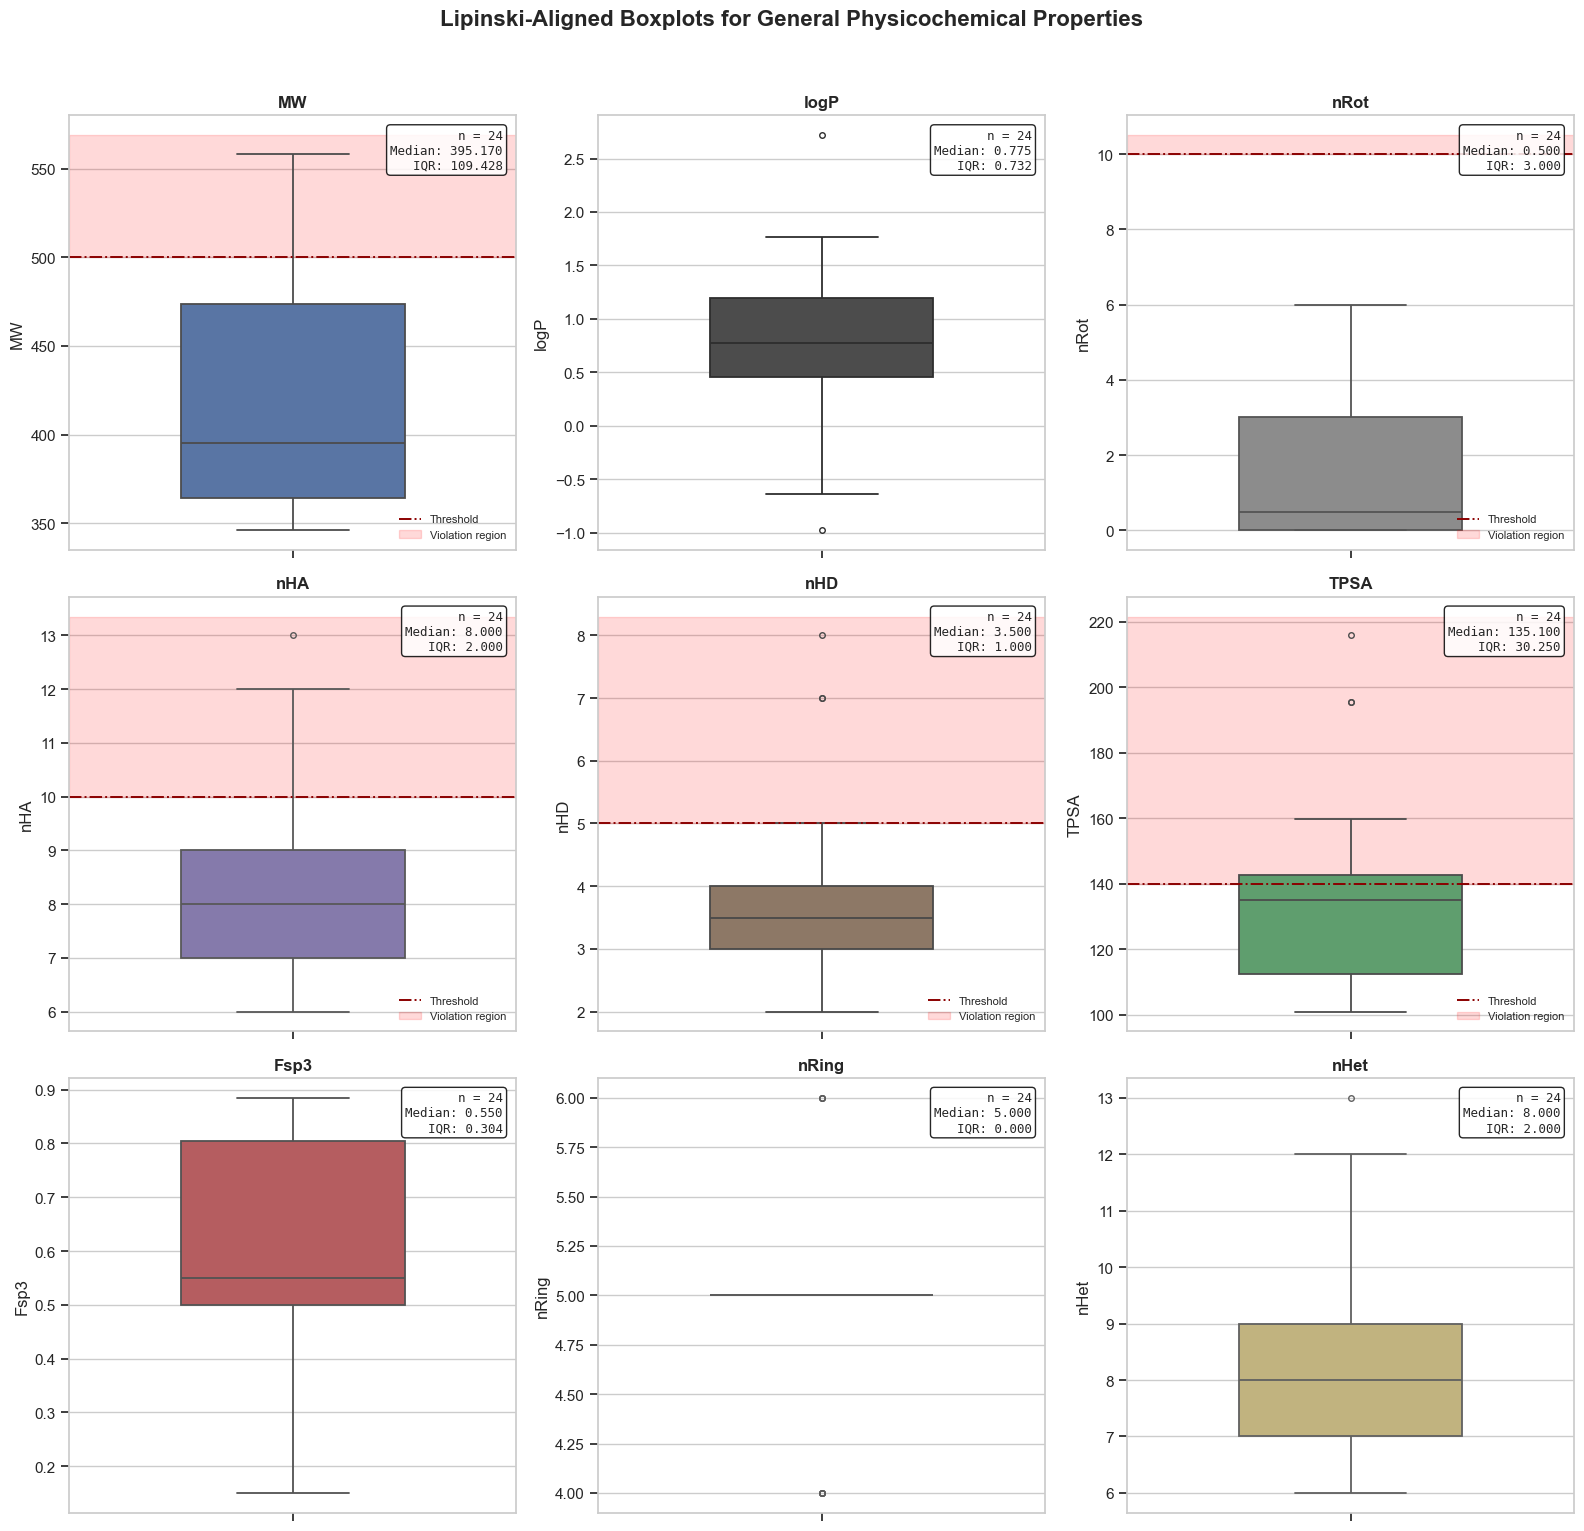

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# =========================================================
# Configuration
# =========================================================
INPUT_FILE = "cuasinoides.xlsx"
SHEET_NAME = "ADMET"
OUTPUT_DIR = "0.FQ"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# =========================================================
# Read data
# =========================================================
df = pd.read_excel(INPUT_FILE, sheet_name=SHEET_NAME)

cols_requested = [
    "MW",
    "logP",
    "nRot",
    "nHA",
    "nHD",
    "TPSA",
    "Fsp3",
    "nRing",
    "nHet"
]

df = df.reindex(columns=cols_requested)

# =========================================================
# Clean column names
# =========================================================
def clean_name(col):
    col = col.replace("[General Properties/", "")
    col = col.replace("] Predictions", "")
    return col.strip()

df = df.rename(columns={c: clean_name(c) for c in df.columns})

# Convert to numeric
df = df.apply(pd.to_numeric, errors="coerce")
df = df.dropna(axis=1, how="all")

# =========================================================
# Descriptor colors + Lipinski / Veber rules
# =========================================================
DESCRIPTOR_RULES = {
    "MW":     {"color": "#4C72B0", "threshold": 500},
    "Log(P)": {"color": "#DD8452", "threshold": 5},
    "TPSA":   {"color": "#55A868", "threshold": 140},
    "nHD":    {"color": "#937860", "threshold": 5},
    "nHA":    {"color": "#8172B3", "threshold": 10},
    "nRot":   {"color": "#8C8C8C", "threshold": 10},
    "Fsp3":   {"color": "#C44E52", "threshold": None},
    "nRing":  {"color": "#64B5CD", "threshold": None},
    "nHet":   {"color": "#CCB974", "threshold": None},
}

# =========================================================
# Plot style
# =========================================================
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("notebook")

# =========================================================
# Boxplot function with Lipinski shading
# =========================================================
def create_boxplot(ax, series, title):
    data = series.dropna()
    if data.empty:
        ax.set_title(title)
        ax.text(0.5, 0.5, "No data", ha="center", va="center")
        return

    rule = DESCRIPTOR_RULES.get(title, {})
    color = rule.get("color", "#4C4C4C")
    threshold = rule.get("threshold", None)

    # Create boxplot
    sns.boxplot(
        y=data,
        ax=ax,
        color=color,
        width=0.5,
        fliersize=4,
        linewidth=1.3
    )

    # Lipinski / Veber forbidden region
    if threshold is not None:
        ax.axhline(
            threshold,
            color="darkred",
            linestyle="-.",
            linewidth=1.4,
            label="Threshold"
        )
        ax.axhspan(
            threshold,
            ax.get_ylim()[1],
            color="red",
            alpha=0.15,
            label="Violation region"
        )

    # Labels and formatting
    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel(title)

    # Statistics text
    text = (
        f"n = {len(data)}\n"
        f"Median: {data.median():.3f}\n"
        f"IQR: {(data.quantile(0.75) - data.quantile(0.25)):.3f}"
    )

    ax.text(
        0.97, 0.97,
        text,
        transform=ax.transAxes,
        ha="right",
        va="top",
        fontsize=9,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.85),
        fontfamily="monospace"
    )

    if threshold is not None:
        ax.legend(fontsize=8, loc="lower right")

# =========================================================
# Create figure
# =========================================================
cols = list(df.columns)
ncols = 3
nrows = int(np.ceil(len(cols) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    create_boxplot(axes[i], df[col], col)

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(
    "Lipinski-Aligned Boxplots for General Physicochemical Properties",
    fontsize=16,
    fontweight="bold",
    y=1.02
)

plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "general_properties_lipinski_boxplots2.png"),
    dpi=350,
    bbox_inches="tight"
)
plt.show()


In [1]:
import pandas as pd

In [2]:
ct=pd.read_excel('cuasinoides.xlsx', sheet_name='pkcsm')

In [3]:
ct

,SMILES,Name,MW,Vol,Dense,nHA,nHD,TPSA,nRot,nRing,...,[General Properties/Log S] Predictions,[General Properties/Log S] Interpretation,[General Properties/Log(Vapor Pressure)] Predictions,[General Properties/Log(Vapor Pressure)] Interpretation,[General Properties/Melting Point] Predictions,[General Properties/Melting Point] Interpretation,[General Properties/pKa Acid] Predictions,[General Properties/pKa Acid] Interpretation,[General Properties/pKa Basic] Predictions,[General Properties/pKa Basic] Interpretation
0,[C@H]1(C(=O)[C@@]2(C)[C@](C[C@@]3([C@@]4(C)[C@...,11-O-trans-pcoumaroyl amarolide,496.25,510.434112,0.972212,7,2,110.13,4,5,...,-5.06,Proper Value: -4 to 0.5 log mol/L,-10.03,Vapor (Gas) Phase: log vp < 4; Vapor and Parti...,233.96,MP<25: liquid; MP>25:solid,5.58,NaN,2.33,NaN
1,C[C@@H]1C[C@@H](C(=O)[C@]2([C@H]1C[C@@H]3[C@@]...,Amarolide,364.19,365.082312,0.997556,6,2,100.90,0,4,...,-2.82,Proper Value: -4 to 0.5 log mol/L,-8.43,Vapor (Gas) Phase: log vp < 4; Vapor and Parti...,240.18,MP<25: liquid; MP>25:solid,5.39,NaN,2.62,NaN
2,[C@H]1(O)C[C@@H](C)[C@]2([H])C[C@@]3([H])OC(=O...,Castelalin,364.22,376.224530,0.968092,5,2,83.83,0,4,...,-2.92,Proper Value: -4 to 0.5 log mol/L,-8.44,Vapor (Gas) Phase: log vp < 4; Vapor and Parti...,180.29,MP<25: liquid; MP>25:solid,6.98,NaN,4.96,NaN
3,[C@@H]1(C[C@H]([C@]2([H])C[C@@]3([H])OC(=O)C[C...,Castelanolide,364.19,365.082312,0.997556,6,3,104.06,0,4,...,-2.66,Proper Value: -4 to 0.5 log mol/L,-9.03,Vapor (Gas) Phase: log vp < 4; Vapor and Parti...,204.08,MP<25: liquid; MP>25:solid,5.36,NaN,3.94,NaN
4,C[C@@H]1[C@@H]2[C@H](C(=O)O[C@H]3[C@@]24CO[C@@...,Castelanone,478.22,466.740002,1.024596,9,3,139.59,4,5,...,-3.28,Proper Value: -4 to 0.5 log mol/L,-10.32,Vapor (Gas) Phase: log vp < 4; Vapor and Parti...,188.34,MP<25: liquid; MP>25:solid,4.42,NaN,3.07,NaN
5,[C@@]1([C@@H](O)[C@@]2(C)[C@](C[C@@]3([C@@]45[...,Casteloside A,542.24,507.123127,1.069247,12,7,195.60,3,6,...,-1.95,Proper Value: -4 to 0.5 log mol/L,-15.09,Vapor (Gas) Phase: log vp < 4; Vapor and Parti...,194.25,MP<25: liquid; MP>25:solid,3.74,NaN,5.66,NaN
6,[C@@]1([C@@H](O)[C@@]2(C)[C@](C[C@@]3([C@@]45[...,Casteloside B,558.23,515.913354,1.082023,13,8,215.83,3,6,...,-1.82,Proper Value: -4 to 0.5 log mol/L,-15.39,Vapor (Gas) Phase: log vp < 4; Vapor and Parti...,194.04,MP<25: liquid; MP>25:solid,2.77,NaN,5.76,NaN
7,[C@H]1(O)C=C([C@]2([H])C[C@@]3([H])OC(=O)C[C@@...,Casteloside C,542.24,507.123127,1.069247,12,7,195.60,3,6,...,-1.82,Proper Value: -4 to 0.5 log mol/L,-14.65,Vapor (Gas) Phase: log vp < 4; Vapor and Parti...,172.87,MP<25: liquid; MP>25:solid,3.56,NaN,5.12,NaN
8,C1(=O)C[C@@H](C)[C@]2([H])C[C@@]3([H])OC(=O)C[...,Chaparramarin,364.19,365.082312,0.997556,6,2,100.90,0,4,...,-2.60,Proper Value: -4 to 0.5 log mol/L,-8.74,Vapor (Gas) Phase: log vp < 4; Vapor and Parti...,215.80,MP<25: liquid; MP>25:solid,4.58,NaN,2.73,NaN
9,C[C@@H]1[C@@H]2CC(=O)O[C@H]3[C@@]24CO[C@@]([C@...,Chaparrin,380.18,367.952539,1.033231,7,4,116.45,0,5,...,-2.37,Proper Value: -4 to 0.5 log mol/L,-11.12,Vapor (Gas) Phase: log vp < 4; Vapor and Parti...,181.10,MP<25: liquid; MP>25:solid,5.60,NaN,5.05,NaN


In [13]:
prop=ct[['MW', 'Vol','Solubilidad (mg/mL)', 'nHA', 'nHD', 'TPSA', 'nRot']]

In [14]:
prop.describe()

,MW,Vol,Solubilidad (mg/mL),nHA,nHD,TPSA,nRot
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,431.697500,417.276202,2833.520304,8.333333,3.875000,135.87500,1.500000
std,65.362934,59.321584,10552.922820,2.035910,1.596532,32.12455,1.793709
min,364.190000,365.082312,0.007290,5.000000,2.000000,83.83000,0.000000
25%,379.677500,372.567865,5.367500,7.000000,3.000000,112.50000,0.000000
50%,396.180000,376.742766,39.550000,8.000000,4.000000,135.10000,0.500000
75%,482.220000,468.937558,132.500000,9.000000,4.000000,142.75000,3.000000
max,558.230000,527.418184,51400.000000,13.000000,8.000000,215.83000,6.000000


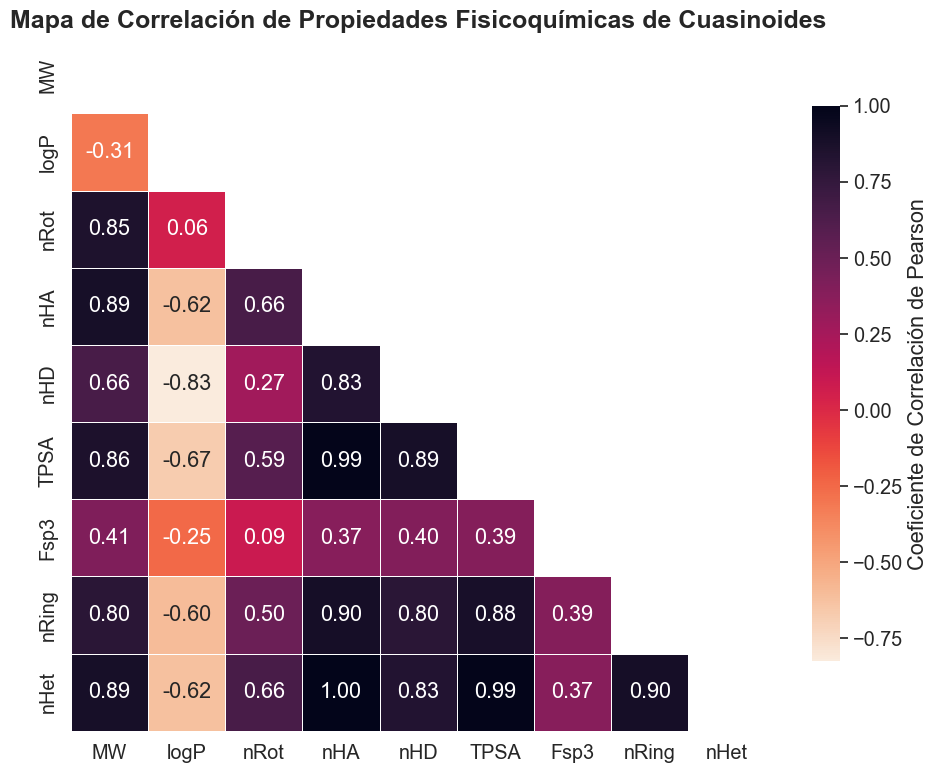

In [9]:
# 📊 Correlation Heatmap of Physicochemical Properties (Cuasinoids)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load dataset ---
df = pd.read_excel("cuasinoides.xlsx", sheet_name="ADMET")
OUTPUT_DIR = "0.FQ"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# --- Select physicochemical columns ---
physicochem_props = ['MW', 'logP', 'nRot', 'nHA', 'nHD', 'TPSA', 'Fsp3', 'nRing', 'nHet',]
data = df[physicochem_props]

# --- Calculate correlation matrix ---
corr = data.corr(method='pearson')

# --- Plot settings ---
sns.set(style="white", font_scale=1.3)
plt.figure(figsize=(10, 8))
plt.title("Mapa de Correlación de Propiedades Fisicoquímicas de Cuasinoides", fontsize=18, weight='bold')

# --- Create mask for upper triangle ---
mask = np.triu(np.ones_like(corr, dtype=bool))

# --- Create heatmap ---
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="rocket_r",
    square=True,
    linewidths=0.7,
    cbar_kws={
        "shrink": 0.8,
        "label": "Coeficiente de Correlación de Pearson"
    }
)

plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "cuasinoides_correlation_heatmap2.png",),
    dpi=350,
    bbox_inches="tight"
)
plt.show()


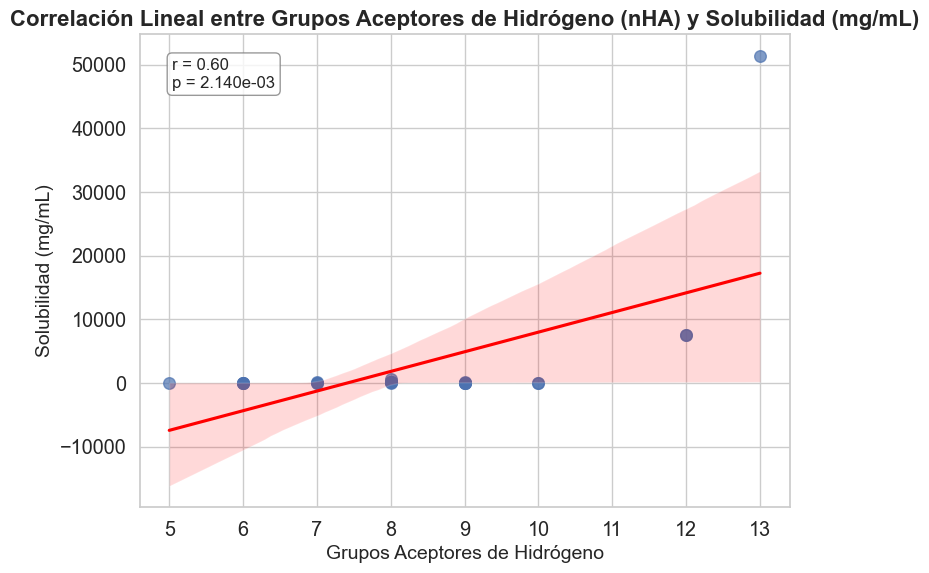

In [16]:
# 📈 Linear Correlation between MW and nHA in Cuasinoids
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# --- Load dataset ---
df = pd.read_excel("cuasinoides.xlsx", sheet_name="pkcsm")

# --- Extract relevant variables ---
x = df["nHA"]
y = df["Solubilidad (mg/mL)"]

# --- Calculate correlation ---
r, p = pearsonr(x, y)

# --- Set visualization style ---
sns.set(style="whitegrid", font_scale=1.3)

# --- Create scatterplot with regression line ---
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x="nHA", y="Solubilidad (mg/mL)", scatter_kws={"s": 70, "alpha": 0.7}, line_kws={"color": "red"})

# --- Titles and labels ---
plt.title("Correlación Lineal entre Grupos Aceptores de Hidrógeno (nHA) y Solubilidad (mg/mL)",
          fontsize=16, weight="bold")
plt.xlabel("Grupos Aceptores de Hidrógeno", fontsize=14)
plt.ylabel("Solubilidad (mg/mL)", fontsize=14)

# --- Annotate correlation coefficient ---
plt.text(
    0.05, 0.95,
    f"r = {r:.2f}\np = {p:.3e}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
)

plt.tight_layout()
plt.savefig("nHA_correlation_vs_solubilidad.png", dpi=300, bbox_inches="tight")
plt.show()


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ct.columns.to_list()

['SMILES',
 'Name',
 'MW',
 'Vol',
 'Dense',
 'nHA',
 'nHD',
 'TPSA',
 'nRot',
 'nRing',
 'MaxRing',
 'nHet',
 'fChar',
 'nRig',
 'Flex',
 'nStereo',
 'gasa',
 'QED',
 'Synth',
 'Fsp3',
 'Solubilidad (mg/mL)',
 '[Absorption/Caco-2 (logPaap)] Predictions',
 '[Absorption/Caco-2 (logPaap)] Interpretation',
 '[Absorption/Human Oral Bioavailability 20%] Predictions',
 '[Absorption/Human Oral Bioavailability 20%] Probability',
 '[Absorption/Human Oral Bioavailability 20%] Interpretation',
 '[Absorption/Human Intestinal Absorption] Predictions',
 '[Absorption/Human Intestinal Absorption] Probability',
 '[Absorption/Human Intestinal Absorption] Interpretation',
 '[Absorption/Madin-Darby Canine Kidney] Predictions',
 '[Absorption/Madin-Darby Canine Kidney] Interpretation',
 '[Absorption/Human Oral Bioavailability 50%] Predictions',
 '[Absorption/Human Oral Bioavailability 50%] Probability',
 '[Absorption/Human Oral Bioavailability 50%] Interpretation',
 '[Absorption/P-Glycoprotein Inhibitor] Pr

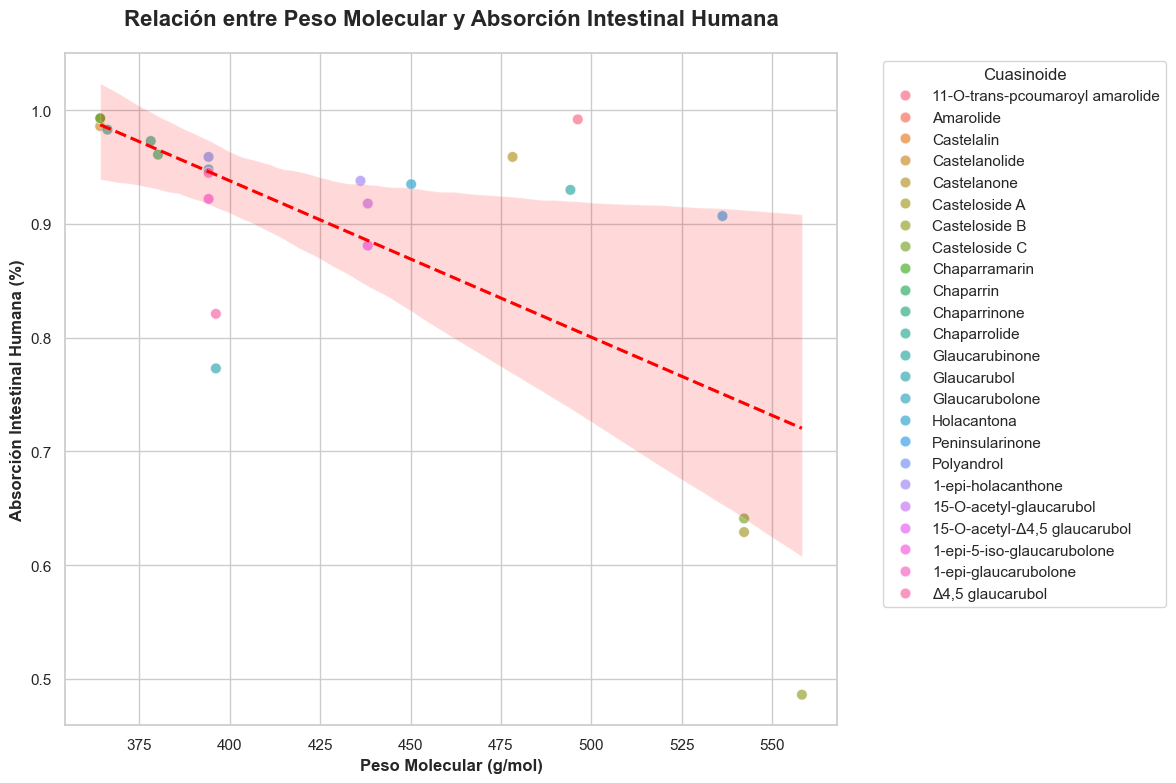

()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración inicial del estilo
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

# Crear el scatter plot, coloreando por 'Name'
sns.scatterplot(
    data=ct, 
    x='MW',   # Columna del Peso Molecular
    y='[Absorption/Human Intestinal Absorption] Probability',  # Columna de Absorción Intestinal Humana
    hue='Name',   # <- Diferencia cada cuasinoide por color
    alpha=0.7,    # Transparencia
    s=60          # Tamaño de los puntos
)

# Añadir línea de tendencia general
sns.regplot(
    data=ct,
    x='MW',
    y='[Absorption/Human Intestinal Absorption] Probability',
    scatter=False,   # No redibujar puntos
    line_kws={'color': 'red', 'linestyle': '--', 'label': 'Tendencia general'}
)

# Personalizar el gráfico
plt.title('Relación entre Peso Molecular y Absorción Intestinal Humana', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Peso Molecular (g/mol)', fontsize=12, fontweight='bold')
plt.ylabel('Absorción Intestinal Humana (%)', fontsize=12, fontweight='bold')

# Mostrar la leyenda con los nombres de los cuasinoides
plt.legend(title='Cuasinoide', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mejorar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()
()

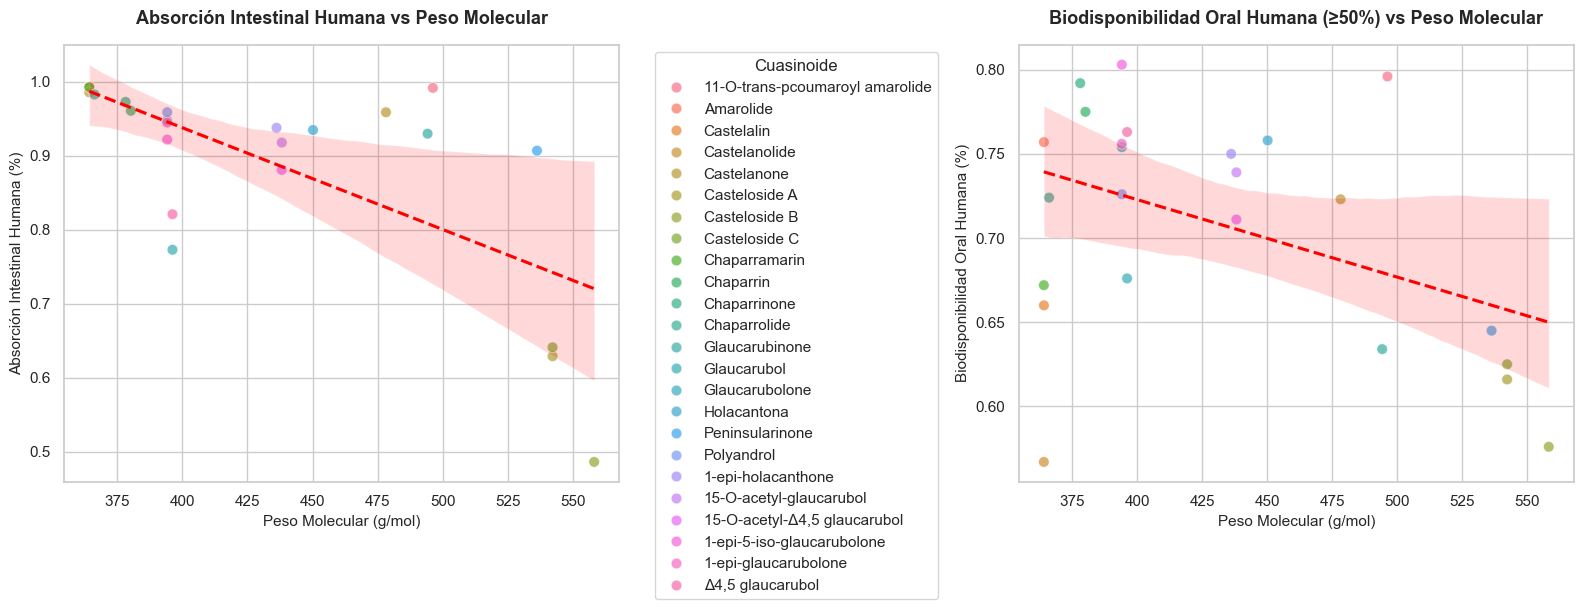

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración inicial del estilo
sns.set_theme(style="whitegrid")

# Crear figura con dos subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ------------------------ #
# Subplot 1: Absorción Intestinal Humana
# ------------------------ #
sns.scatterplot(
    data=ct, 
    x='MW',   
    y='[Absorption/Human Intestinal Absorption] Probability',  
    hue='Name',  
    alpha=0.7, 
    s=60, 
    ax=axes[0]
)

# Línea de tendencia general
sns.regplot(
    data=ct,
    x='MW',
    y='[Absorption/Human Intestinal Absorption] Probability',
    scatter=False,
    line_kws={'color': 'red', 'linestyle': '--', 'label': 'Tendencia general'},
    ax=axes[0]
)

axes[0].set_title('Absorción Intestinal Humana vs Peso Molecular', 
                  fontsize=13, fontweight='bold', pad=15)
axes[0].set_xlabel('Peso Molecular (g/mol)', fontsize=11)
axes[0].set_ylabel('Absorción Intestinal Humana (%)', fontsize=11)
axes[0].legend(title='Cuasinoide', bbox_to_anchor=(1.05, 1), loc='upper left')

# ------------------------ #
# Subplot 2: Biodisponibilidad Oral Humana ≥50%
# ------------------------ #
sns.scatterplot(
    data=ct, 
    x='MW',   
    y='[Absorption/Human Oral Bioavailability 50%] Probability',  
    hue='Name',  
    alpha=0.7, 
    s=60, 
    ax=axes[1],
    legend=False   # Evitar duplicar la leyenda
)

sns.regplot(
    data=ct,
    x='MW',
    y='[Absorption/Human Oral Bioavailability 50%] Probability',
    scatter=False,
    line_kws={'color': 'red', 'linestyle': '--', 'label': 'Tendencia general'},
    ax=axes[1]
)

axes[1].set_title('Biodisponibilidad Oral Humana (≥50%) vs Peso Molecular', 
                  fontsize=13, fontweight='bold', pad=15)
axes[1].set_xlabel('Peso Molecular (g/mol)', fontsize=11)
axes[1].set_ylabel('Biodisponibilidad Oral Humana (%)', fontsize=11)

# Ajustar espaciado general
plt.tight_layout()
# Guardar imagen
plt.savefig("Absorcion_Biodisponibilidad_vs_PesoMolecular.png", dpi=300, bbox_inches='tight')
# Mostrar figura completa
plt.show()



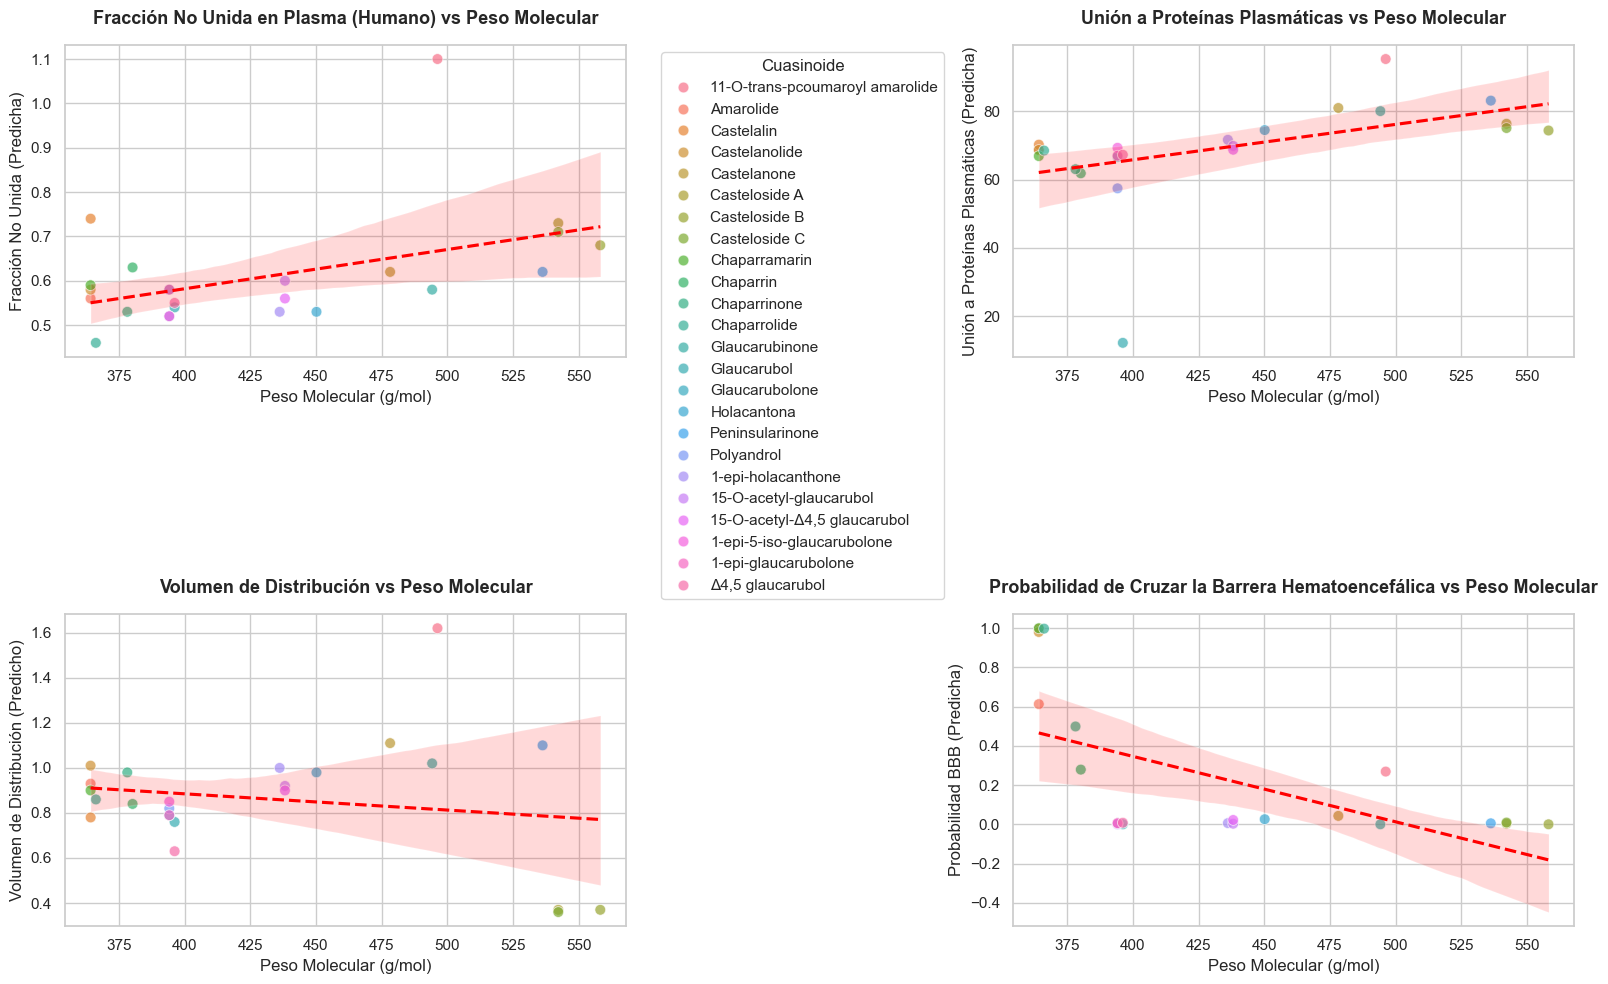

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo
sns.set_theme(style="whitegrid")

# Crear figura con 2 filas y 2 columnas de subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# ------------------------ #
# Subplot (0,0): Fracción no unida (Human)
# ------------------------ #
sns.scatterplot(
    data=ct,
    x='MW',
    y='[Distribution/Fraction Unbound (Human)] Predictions',
    hue='Name',
    alpha=0.7,
    s=60,
    ax=axes[0, 0]
)
sns.regplot(
    data=ct,
    x='MW',
    y='[Distribution/Fraction Unbound (Human)] Predictions',
    scatter=False,
    line_kws={'color': 'red', 'linestyle': '--', 'label': 'Tendencia general'},
    ax=axes[0, 0]
)
axes[0, 0].set_title('Fracción No Unida en Plasma (Humano) vs Peso Molecular',
                     fontsize=13, fontweight='bold', pad=15)
axes[0, 0].set_xlabel('Peso Molecular (g/mol)', fontsize=12)
axes[0, 0].set_ylabel('Fracción No Unida (Predicha)', fontsize=12)
axes[0, 0].legend(title='Cuasinoide', bbox_to_anchor=(1.05, 1), loc='upper left')

# ------------------------ #
# Subplot (0,1): Unión a Proteínas Plasmáticas
# ------------------------ #
sns.scatterplot(
    data=ct,
    x='MW',
    y='[Distribution/Plasma Protein Binding] Predictions',
    hue='Name',
    alpha=0.7,
    s=60,
    ax=axes[0, 1],
    legend=False
)
sns.regplot(
    data=ct,
    x='MW',
    y='[Distribution/Plasma Protein Binding] Predictions',
    scatter=False,
    line_kws={'color': 'red', 'linestyle': '--'},
    ax=axes[0, 1]
)
axes[0, 1].set_title('Unión a Proteínas Plasmáticas vs Peso Molecular',
                     fontsize=13, fontweight='bold', pad=15)
axes[0, 1].set_xlabel('Peso Molecular (g/mol)', fontsize=12)
axes[0, 1].set_ylabel('Unión a Proteínas Plasmáticas (Predicha)', fontsize=12)

# ------------------------ #
# Subplot (1,0): Volumen de Distribución
# ------------------------ #
sns.scatterplot(
    data=ct,
    x='MW',
    y='[Distribution/Steady State Volume of Distribution] Predictions',
    hue='Name',
    alpha=0.7,
    s=60,
    ax=axes[1, 0],
    legend=False
)
sns.regplot(
    data=ct,
    x='MW',
    y='[Distribution/Steady State Volume of Distribution] Predictions',
    scatter=False,
    line_kws={'color': 'red', 'linestyle': '--'},
    ax=axes[1, 0]
)
axes[1, 0].set_title('Volumen de Distribución vs Peso Molecular',
                     fontsize=13, fontweight='bold', pad=15)
axes[1, 0].set_xlabel('Peso Molecular (g/mol)', fontsize=12)
axes[1, 0].set_ylabel('Volumen de Distribución (Predicho)', fontsize=12)

# ------------------------ #
# Subplot (1,1): Barrera Hematoencefálica (BBB)
# ------------------------ #
sns.scatterplot(
    data=ct,
    x='MW',
    y='[Distribution/Blood-Brain Barrier] Probability',
    hue='Name',
    alpha=0.7,
    s=60,
    ax=axes[1, 1],
    legend=False
)
sns.regplot(
    data=ct,
    x='MW',
    y='[Distribution/Blood-Brain Barrier] Probability',
    scatter=False,
    line_kws={'color': 'red', 'linestyle': '--'},
    ax=axes[1, 1]
)
axes[1, 1].set_title('Probabilidad de Cruzar la Barrera Hematoencefálica vs Peso Molecular',
                     fontsize=13, fontweight='bold', pad=15)
axes[1, 1].set_xlabel('Peso Molecular (g/mol)', fontsize=12)
axes[1, 1].set_ylabel('Probabilidad BBB (Predicha)', fontsize=12)

# Ajustar diseño
plt.tight_layout()

# Guardar la figura en alta resolución
plt.savefig("Distribucion_vs_PesoMolecular_4subplots.png", dpi=300, bbox_inches='tight')

# Mostrar figura
plt.show()


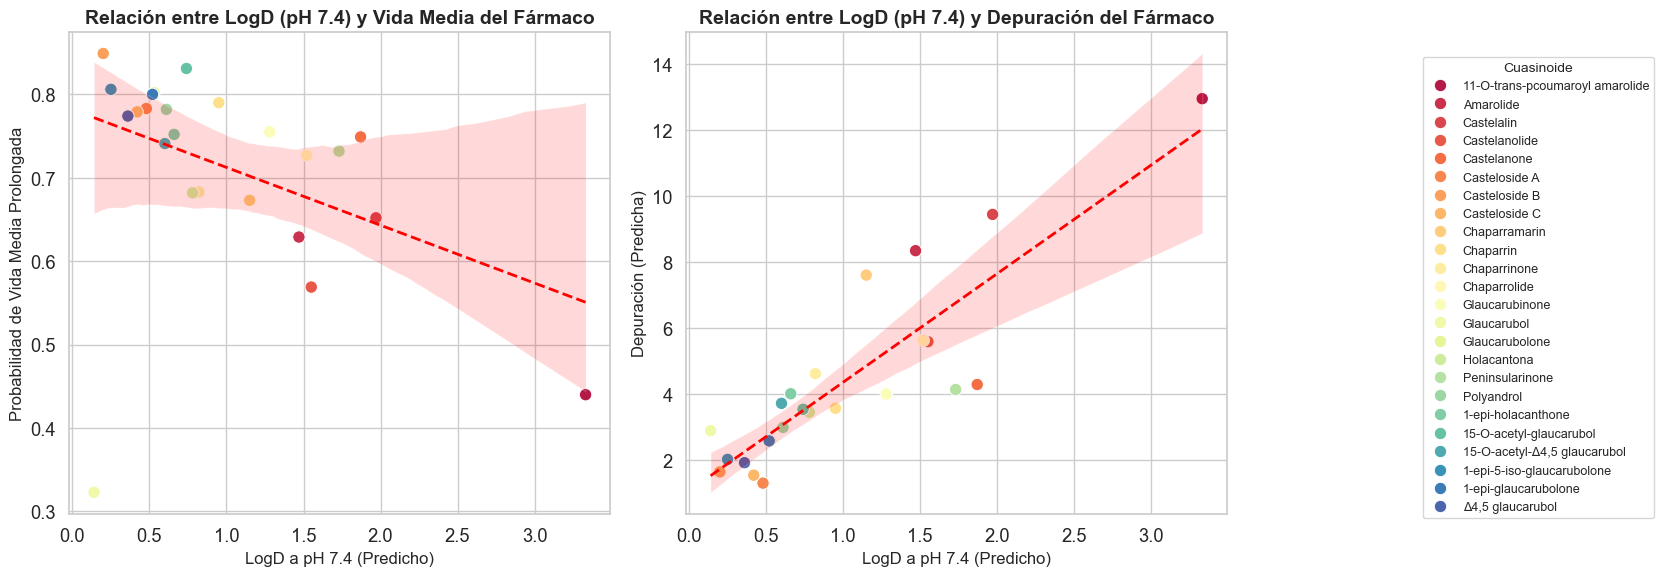

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Cargar los datos ===
df = pd.read_excel("cuasinoides.xlsx", sheet_name='pkcsm')

# === Configurar el estilo ===
sns.set(style="whitegrid", font_scale=1.2)

# === Crear figura con dos subgráficos ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False, sharey=False)

# === Primer gráfico: LogD vs Vida media ===
sns.scatterplot(
    data=df,
    x='[General Properties/Log(D) at pH=7.4] Predictions',
    y='[Excretion/Half-Life of Drug] Probability',
    hue='Name',
    palette='Spectral',
    s=80,
    ax=axes[0],
    legend=False
)

sns.regplot(
    data=df,
    x='[General Properties/Log(D) at pH=7.4] Predictions',
    y='[Excretion/Half-Life of Drug] Probability',
    scatter=False,
    ax=axes[0],
    color='red',
    line_kws={'linestyle': '--', 'lw': 2}
)

axes[0].set_title("Relación entre LogD (pH 7.4) y Vida Media del Fármaco", fontsize=14, weight='bold')
axes[0].set_xlabel("LogD a pH 7.4 (Predicho)", fontsize=12)
axes[0].set_ylabel("Probabilidad de Vida Media Prolongada", fontsize=12)

# === Segundo gráfico: LogD vs Depuración ===
scatter_ax = sns.scatterplot(
    data=df,
    x='[General Properties/Log(D) at pH=7.4] Predictions',
    y='[Excretion/Clearance] Predictions',
    hue='Name',
    palette='Spectral',
    s=80,
    ax=axes[1]
)

sns.regplot(
    data=df,
    x='[General Properties/Log(D) at pH=7.4] Predictions',
    y='[Excretion/Clearance] Predictions',
    scatter=False,
    ax=axes[1],
    color='red',
    line_kws={'linestyle': '--', 'lw': 2}
)

axes[1].set_title("Relación entre LogD (pH 7.4) y Depuración del Fármaco", fontsize=14, weight='bold')
axes[1].set_xlabel("LogD a pH 7.4 (Predicho)", fontsize=12)
axes[1].set_ylabel("Depuración (Predicha)", fontsize=12)

# === Obtener handles y labels de la segunda gráfica ===
handles, labels = scatter_ax.get_legend_handles_labels()

# === Eliminar la leyenda interna ===
scatter_ax.legend_.remove()

# === Crear una sola leyenda fuera de los gráficos ===
fig.legend(
    handles, labels,
    title='Cuasinoide',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=True,
    fontsize=9,
    title_fontsize=10
)

# === Ajustar layout para dejar espacio a la derecha ===
plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.show()

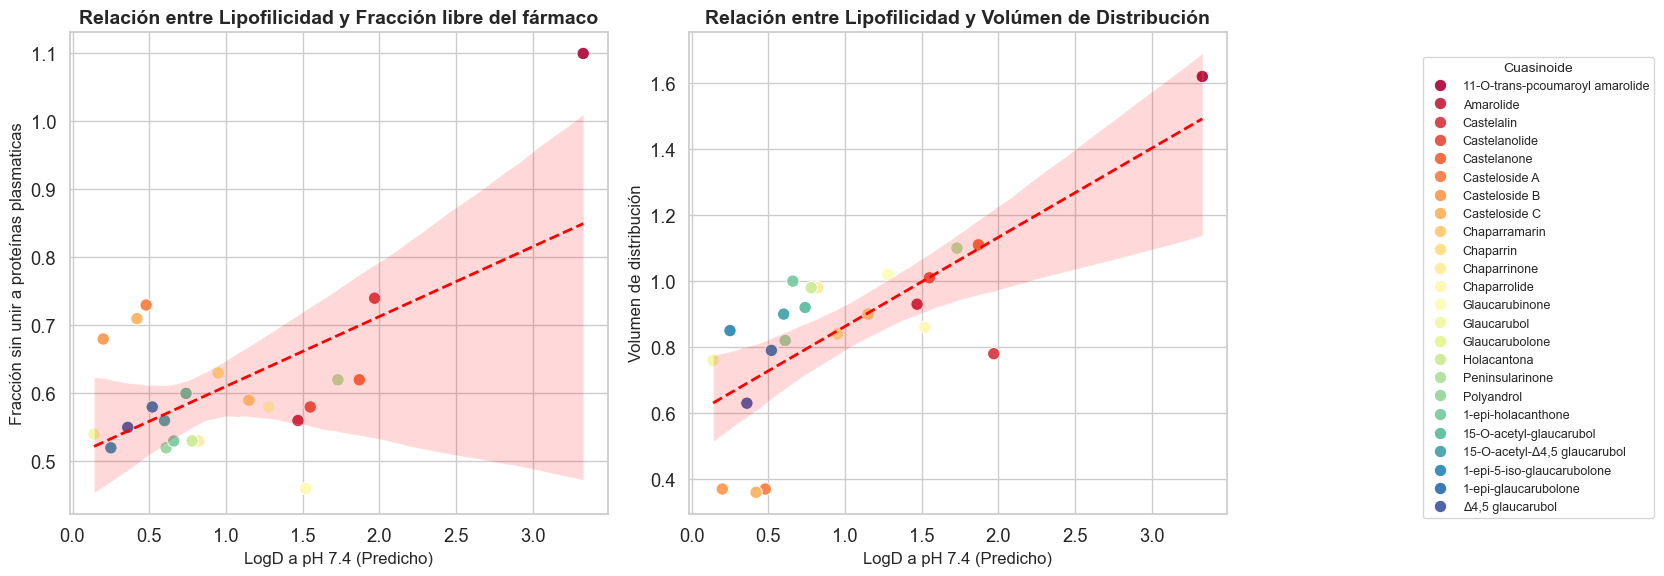

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Cargar los datos ===
df = pd.read_excel("cuasinoides.xlsx", sheet_name='pkcsm')

# === Configurar el estilo ===
sns.set(style="whitegrid", font_scale=1.2)

# === Crear figura con dos subgráficos ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False, sharey=False)

# === Primer gráfico: LogD vs Vida media ===
sns.scatterplot(
    data=df,
    x='[General Properties/Log(D) at pH=7.4] Predictions',
    y='[Distribution/Fraction Unbound (Human)] Predictions',
    hue='Name',
    palette='Spectral',
    s=80,
    ax=axes[0],
    legend=False
)

sns.regplot(
    data=df,
    x='[General Properties/Log(D) at pH=7.4] Predictions',
    y='[Distribution/Fraction Unbound (Human)] Predictions',
    scatter=False,
    ax=axes[0],
    color='red',
    line_kws={'linestyle': '--', 'lw': 2}
)

axes[0].set_title("Relación entre Lipofilicidad y Fracción libre del fármaco", fontsize=14, weight='bold')
axes[0].set_xlabel("LogD a pH 7.4 (Predicho)", fontsize=12)
axes[0].set_ylabel("Fracción sin unir a proteínas plasmaticas", fontsize=12)

# === Segundo gráfico: LogD vs Depuración ===
scatter_ax = sns.scatterplot(
    data=df,
    x='[General Properties/Log(D) at pH=7.4] Predictions',
    y='[Distribution/Steady State Volume of Distribution] Predictions',
    hue='Name',
    palette='Spectral',
    s=80,
    ax=axes[1]
)

sns.regplot(
    data=df,
    x='[General Properties/Log(D) at pH=7.4] Predictions',
    y='[Distribution/Steady State Volume of Distribution] Predictions',
    scatter=False,
    ax=axes[1],
    color='red',
    line_kws={'linestyle': '--', 'lw': 2}
)

axes[1].set_title("Relación entre Lipofilicidad y Volúmen de Distribución", fontsize=14, weight='bold')
axes[1].set_xlabel("LogD a pH 7.4 (Predicho)", fontsize=12)
axes[1].set_ylabel("Volumen de distribución", fontsize=12)

# === Obtener handles y labels de la segunda gráfica ===
handles, labels = scatter_ax.get_legend_handles_labels()

# === Eliminar la leyenda interna ===
scatter_ax.legend_.remove()

# === Crear una sola leyenda fuera de los gráficos ===
fig.legend(
    handles, labels,
    title='Cuasinoide',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=True,
    fontsize=9,
    title_fontsize=10
)

# === Ajustar layout para dejar espacio a la derecha ===
plt.tight_layout(rect=[0, 0, 0.9, 1])
# Guardar la figura en alta resolución
plt.savefig("Distribucion_vs_Log D .png", dpi=300, bbox_inches='tight')
plt.show()